# 01 Image Preprocessing - PART 03 - PREPARATION

### Imports

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sys import getsizeof
from tensorflow import keras

### Mode of running

In [2]:
TEST_MODE = False

### Paths

In [3]:
BASE_PATH = './data'
ORIGINAL_IMAGES = f'{BASE_PATH}/unsplit'

In [4]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Reading the augmented images

In [12]:
def read_images():
    dataset = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            dataset.append([img, cat_num])
        if TEST_MODE and cat_num == 2:
            break # - then will only take the images from the first category
            
    return dataset

In [6]:
dataset = read_images()
len(dataset)

2834

In [11]:
dataset[0][0].shape

(859, 1200, 3)

### Calculating the optimum size for image resizing

In [7]:
sizes = np.zeros((len(dataset),2))
for _idx, _data in enumerate(dataset):
    sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]

In [8]:
avg_dims = sizes.mean(axis=0)
avg_dims

array([569.00892857, 735.921875  ])

In [9]:
cat_avg_dims = np.zeros((len(CATEGORIES), 2))

for cat_num in range(len(CATEGORIES)):
    _data_in_cat = [data for data in dataset if data[1] == cat_num]
    _sizes = np.zeros((len(_data_in_cat), 2))
    for _idx, _data in enumerate(_data_in_cat):
        _sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]
    cat_avg_dims[cat_num] = _sizes.mean(axis=0)
    
cat_avg_dims

array([[ 804.73333333, 1003.78333333],
       [ 796.85      , 1044.53333333],
       [ 817.2       , 1099.88333333],
       [ 783.31707317, 1111.24390244],
       [ 365.94234592,  469.07753479],
       [ 877.48333333, 1054.8       ],
       [ 869.13333333, 1148.93333333],
       [ 840.82692308, 1091.59615385]])

In [10]:
opt_dims = np.ceil(avg_dims/100.0)*100    # ceiling to the nearest hundred
opt_dims

array([600., 800.])

### Resizing images to `opt_dims`

In [11]:
dataset[0][0].shape

(859, 1200, 3)

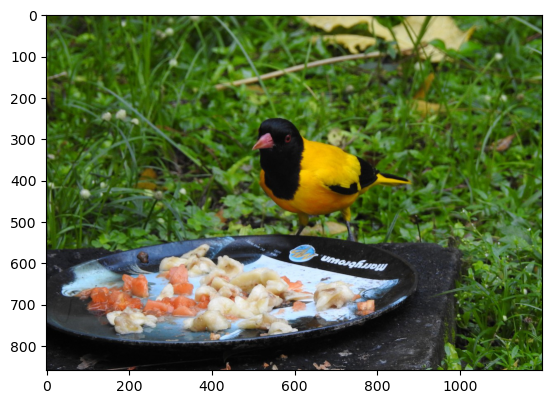

In [12]:
plt.imshow(dataset[0][0][:,:])

In [13]:
opt_dims

array([600., 800.])

In [14]:
# dataset[0][0] = cv2.resize(dataset[0][0], (int(opt_dims[1]), int(opt_dims[0])))
# plt.imshow(dataset[0][0])

In [15]:
# dataset[0][0].shape

In [16]:
for data in dataset:
    data[0] = cv2.resize(data[0], (int(opt_dims[1]), int(opt_dims[0])))

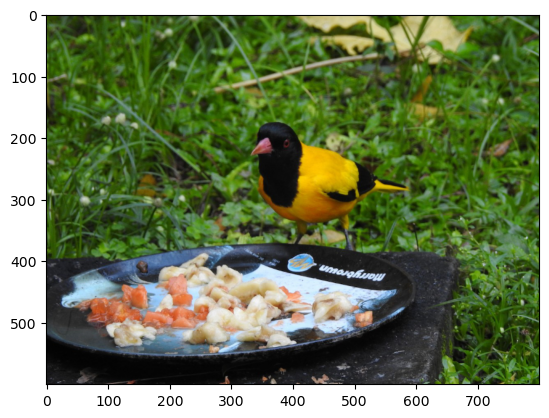

In [17]:
plt.imshow(dataset[0][0])

### Image Augmentation

In [18]:
AUG_COUNT_PER_IMG = TEST_MODE_AUG_COUNT if TEST_MODE else RUN_MODE_AUG_COUNT

In [19]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [20]:
# TO TEST ONLY
pic_array = dataset[0][0].reshape((1,) + dataset[0][0].shape)
pic_array.shape

(1, 600, 800, 3)

In [21]:
# batch_size: At a time, how many images should be generated.
for data in dataset:
        reshaped_img = data[0].reshape((1,) + data[0].shape)
        count = 0
        cat_name = CATEGORIES[data[1]]
        if cat_name == "Other":
            continue
        for batch in datagen.flow(reshaped_img, batch_size=1, save_to_dir=os.path.join(ORIGINAL_IMAGES,cat_name), 
                                  save_prefix=cat_name, save_format='.jpg'):
            count += 1
            if count == AUG_COUNT_PER_IMG:
                break

In [22]:
del dataset

### Read Augmented set of images and Rescale

In [23]:
aug_dataset = read_images()
len(aug_dataset)

2834

In [24]:
getsizeof(aug_dataset)/1024

22.5859375

In [27]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [28]:
mem_err_avoid_batch_size = 100
itr = 0
start = itr*mem_err_avoid_batch_size
end = np.min((itr+1)*mem_err_avoid_batch_size + 1, len(aug_dataset))

AxisError: axis 2834 is out of bounds for array of dimension 0

In [ ]:
resized_aug_dataset = []

for aug_data in aug_dataset:
    resized_aug_dataset.append(aug_data[0]/255.)

In [ ]:
resized_aug_dataset

In [ ]:
plt.imshow(aug_dataset[0][0])

In [22]:
random.shuffle(training_data)

NameError: name 'training_data' is not defined